# Diffie–Hellman Key Exchange Algorithm

## About 
Diffie–Hellman key exchange is a method of securely exchanging cryptographic keys over a public channel and was one of the first public-key protocols as conceived by Ralph Merkle and named after Whitfield Diffie and Martin Hellman. Diffie–Hellman is one of the earliest practical examples of public key exchange implemented within the field of cryptography.

Diffie-Hellman, uses Asymetric Key cryptography to communicate the Key securely through the media.

## Algorithm

1. Select a random prime number, **q**
2. Calculate $\alpha$, such that, $\alpha$ is the **Primitive Root of q** and $\alpha$ > q
3. **For User A:**
    1. Select **Private Key** , **pvtKey<sub>a</sub>**, such that pvtKey<sub>a</sub> < q
    2. Calculate **Public Key**, **pubKey<sub>a</sub> = $\alpha$<sup>pvtKey<sub>a</sub></sup> mod q**
4. **For User B:**
    1. Select **Private Key** , **pvtKey<sub>b</sub>**, such that pvtKey<sub>b</sub> < q
    2. Calculate **Public Key**, **pubKey<sub>b</sub> = $\alpha$<sup>pvtKey<sub>b</sub></sup> mod q**

After the above steps we get a **pair of Private and Public Keys** for each User. These are to be **used** for generating the final **Key**.


**User A :** { Private Key of A , Public Key of A } = { **pvtKey<sub>a</sub>** , **pubKey<sub>a</sub>**  }

**User B :** { Private Key of B , Public Key of B } = { **pvtKey<sub>b</sub>** , **pubKey<sub>b</sub>**  }

Generate **Key**, **K<sub>a</sub> & K<sub>b</sub>**  at both users' end. ***If keys generated***, **match**, the Key Exchange process is **Successful**.

***Note:*** The Private Key of a user is known only to that user and no other user has the access to it. While the Public Key of all the users are known to all the users in the network.

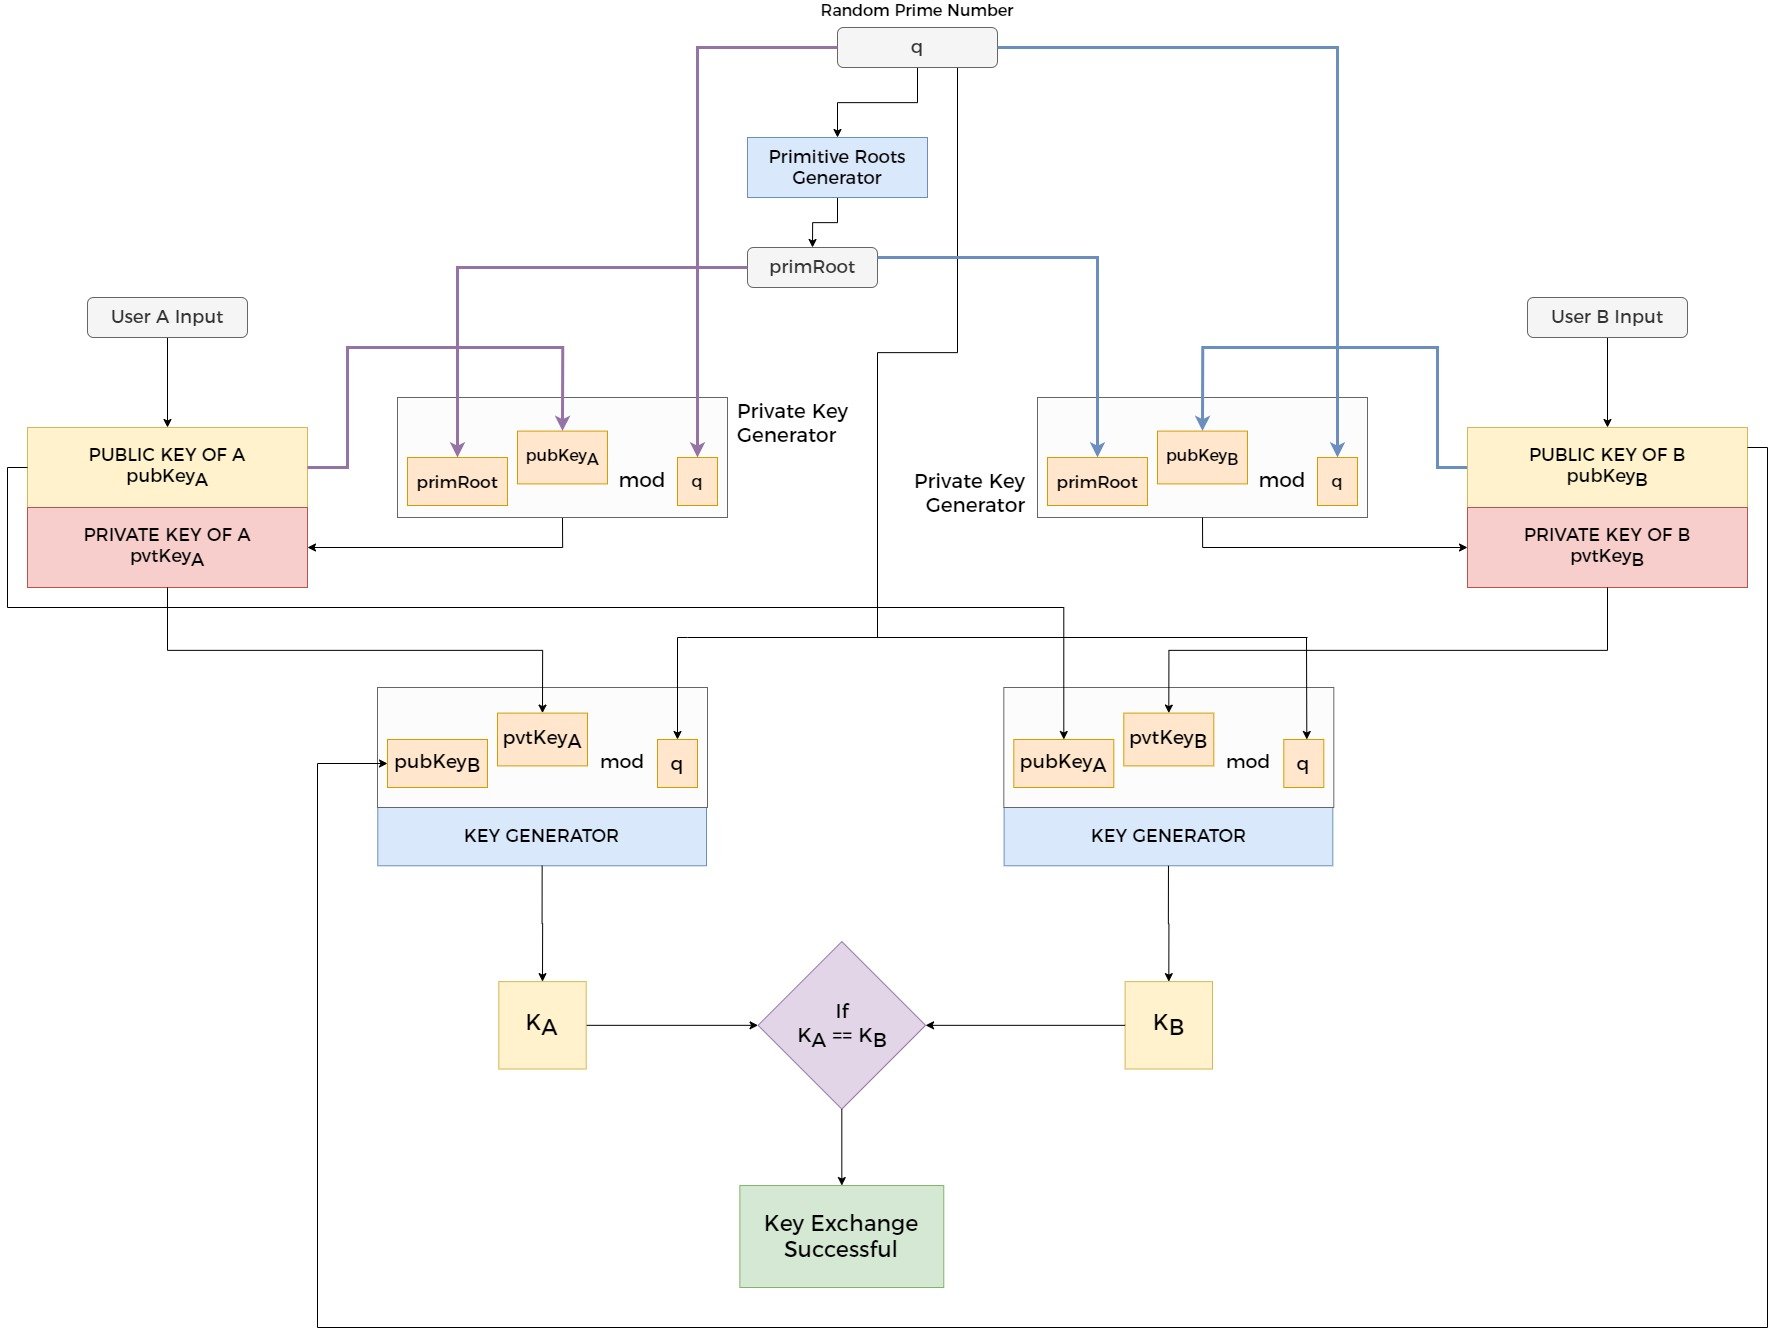

## Key Generation

For User A, **K<sub>a</sub> = pubKey<sub>b</sub> <sup>pvtKey <sub>a</sub> </sup> mod q**


For User B, **K<sub>b</sub> = pubKey<sub>a</sub> <sup>pvtKey <sub>b</sub> </sup> mod q**


If **K<sub>a</sub> = K<sub>b</sub>** then the **Key Exchange** is **Successful**. And The final secret key is ***K = K<sub>a</sub> = K<sub>b</sub>***

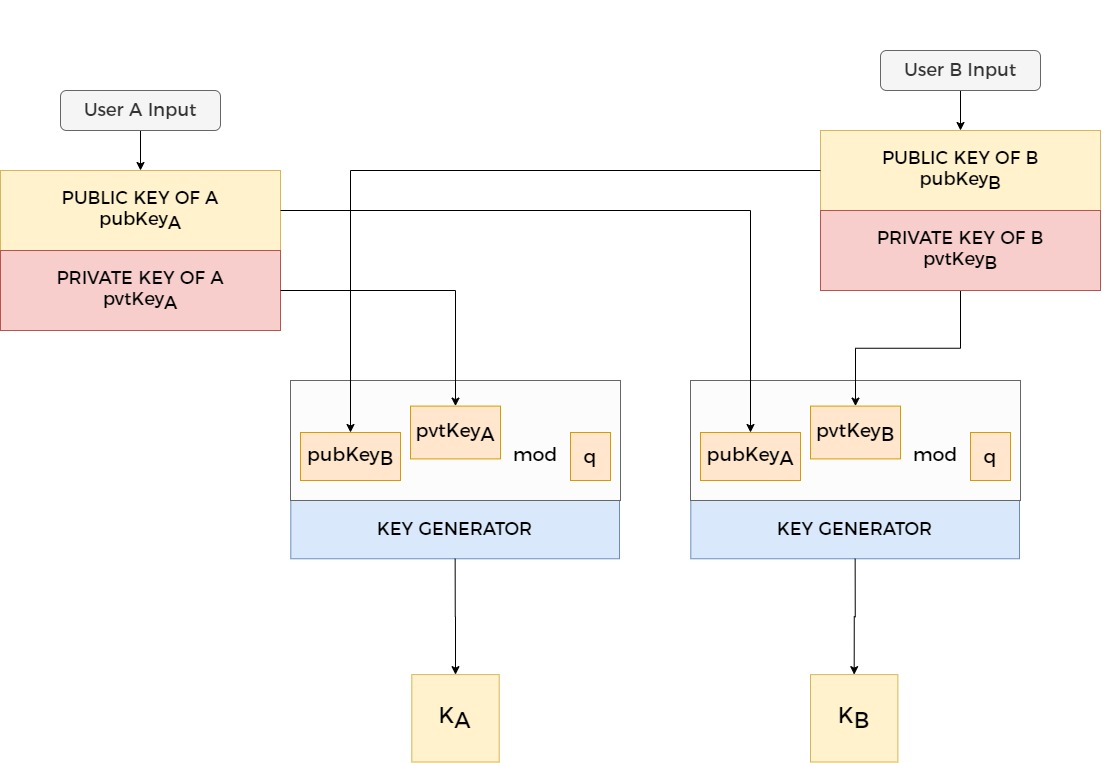

In [13]:
from sympy import *
from termcolor import colored
import random

# ------ Generate q ------ #

q = randprime(0, 250)

# ------ Funtion to Generate ------ #

def generateKey(pubKey, pvtKey):
    return (pubKey**pvtKey)%q

# ------ Funtion to Generate Public Key ------ #

def publicKey(key, pr):
    return (pr**key)%q


# ------ Funtion to Determine primitive roots ------ #

def primitiveRoot(q):
    setOfPR = []
    a = 1
    while a<q:
        rootSet= set()
        reqSet = set()
        for i in range(1, q):
            rootSet.add(int((a**i)%q))
        #print(rootSet)
        for j in range(1, q):
            reqSet.add(j)
        if rootSet == reqSet:
            setOfPR.append(a)
            a += 1
            #break
        else:
            a += 1
    print("Primitive Roots of q = ", setOfPR, end="\n\n")
    return random.choice(setOfPR)


print("q = ", q, end="\n\n")


# -------------- Primitive root of q -------------- #

primRoot = primitiveRoot(q)


print("Selected (at random) Primitive Root of q = ", primRoot, end="\n\n")  


# -------------- Name of user A and B -------------- #

a , b = input("Enter the Names of the two users communicating: ").split(" ") 


# ------------------ User A Operations ------------------ #

# Private Key of user A
privateKeyOfA = int(input("\nSelect {}'s Private Key (less than q): ".format(a)))


# Public Key of user A
publicKeyOfA = publicKey(privateKeyOfA, primRoot)


# Print Public Key of A
print("Keys of User {}".format(a))
print("--- Private Key : ", privateKeyOfA)
print("--- Public  Key : ", publicKeyOfA)


# ------------------ User B Operations ------------------ #

# Private Key of user B
privateKeyOfB = int(input("\nSelect {}'s Private Key (less than q): ".format(b)))


# Public Key of user B
publicKeyOfB = publicKey(privateKeyOfB, primRoot)


# Print Public Key of B
print("Keys of User {}".format(b))
print("--- Private Key : ", privateKeyOfB)
print("--- Public  Key : ", publicKeyOfB)

# ------------------ Key Generation ------------------ #

print("\nKey Generation")


# Key Generation for A
print("\nGenerate Key for {}".format(a))
keyA = generateKey(publicKeyOfB, int(input("--- Enter {}'s Private Key: ".format(a))))
print("--- Key generated for {} is {}".format(a, keyA))


# Key Generation for B
print("\nGenerate Key for {}".format(b))
keyB = generateKey(publicKeyOfA, int(input("--- Enter {}'s Private Key: ".format(b))))
print("--- Key generated for {} is {}".format(b, keyB))


# ------------------- Key Exchange Verification ------------------- #

if keyA == keyB :
    print(colored("\nKey Exchange Successful!", 'green'))
    print(colored("--- Your Key is {}".format(keyA) , 'green'))
else:
    print(colored("\nKey Exchange Failed!", 'red'))

q =  211

Primitive Roots of q =  [2, 3, 7, 17, 22, 29, 35, 39, 41, 48, 57, 72, 75, 85, 91, 92, 106, 108, 112, 116, 118, 127, 130, 131, 133, 141, 142, 145, 149, 152, 155, 158, 159, 160, 162, 164, 165, 166, 167, 174, 175, 181, 187, 191, 195, 202, 205, 207]

Selected (at random) Primitive Root of q =  17

Enter the Names of the two users communicating: A B

Select A's Private Key (less than q): 156
Keys of User A
--- Private Key :  156
--- Public  Key :  113

Select B's Private Key (less than q): 207
Keys of User B
--- Private Key :  207
--- Public  Key :  102

Key Generation

Generate Key for A
--- Enter A's Private Key: 156
--- Key generated for A is 203

Generate Key for B
--- Enter B's Private Key: 207
--- Key generated for B is 203

Key Exchange Successful!
--- Your Key is 203


#### Tanmoy Sen Gupta
[tanmoysg.com](http://tanmoysg.com) | +91 9864809029 | tanmoysps@gmail.com